In [5]:
import pickle as PKL
from tools import analysistools as atools
import os
import time
import glob
import numpy as np
import matplotlib.pyplot as plt
from nanoparticle import CoveredNanoParticlePhenome
import pandas as pd
import seaborn as sns

In [58]:
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = (15.0, 8.0)

In [114]:
######### !!!!!!!!!!!!!!!!ADJUST THIS FOR RANDOMROTS: [24:]
data = {}
for rot in [0,1,2,3,4,5]:
    pickles = glob.glob("db/MODELSFIXED/pickles{}/*.p".format(rot))
    for pickle in pickles:
        iden = pickle[24:][:-2]
        model,affinity,_ = iden.split('-')
        if affinity in data:
            if model in data[affinity]:
                data[affinity][model].append(pickle)
            else:
                data[affinity][model] = [pickle]
        else:            
            data[affinity] = {}
            data[affinity][model] = [pickle]

In [115]:
print(data['200.0']['liney30'])

['db/MODELSFIXED/pickles0/liney30-200.0-0.p', 'db/MODELSFIXED/pickles1/liney30-200.0-0.p', 'db/MODELSFIXED/pickles2/liney30-200.0-0.p', 'db/MODELSFIXED/pickles3/liney30-200.0-0.p', 'db/MODELSFIXED/pickles4/liney30-200.0-0.p', 'db/MODELSFIXED/pickles5/liney30-200.0-0.p']


In [173]:
#fitness plots
affinity = '250.0'
plotData = []

for model, rotp in data[affinity].items():
    affinitydata[model] = []
    modeldata = []
    if len(rotp) != 6:
        raise ValueError
    for rotp_i in rotp:
        Fitness = None
        data_i = PKL.load(open(rotp_i))
        fit = data_i[5]
        bT = data_i[6]
        
        if fit == 400:
            Fitness = fit + (1.0 - (bT/25000))*600.0
        else:
            Fitness = fit
        modeldata.append(Fitness)
    plotData.append((model,np.average(modeldata)))

Text(0.5,1,'performance of models with fixed rotations at fixed affinity 250.0')

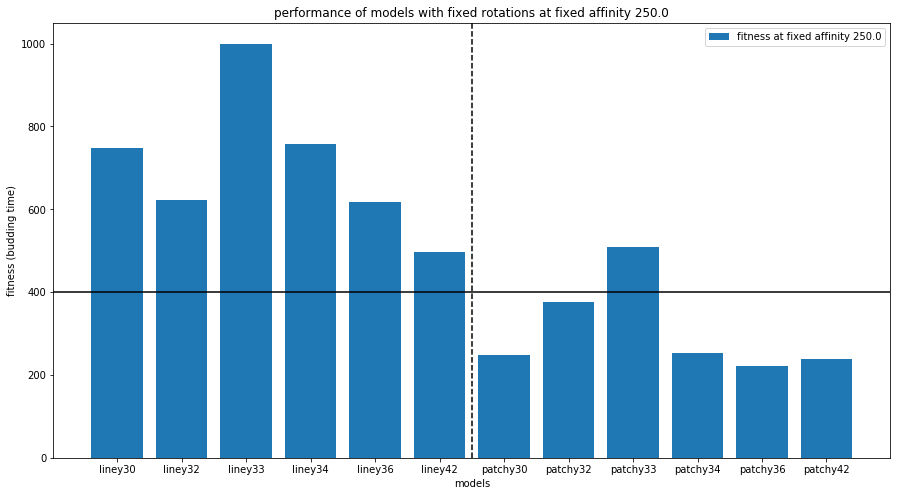

In [174]:
plotData = sorted(plotData, key=lambda x:x[0])
plt.bar([i[0] for i in plotData], [i[1] for i in plotData], label='fitness at fixed affinity {}'.format(affinity))
plt.axhline(y=400.0, c='k')
plt.axvline(x=5.5, c='k',ls='--')
plt.ylabel('fitness (budding time)')
plt.legend()
plt.xlabel('models')
plt.title('performance of models with fixed rotations at fixed affinity {}'.format(affinity))

In [176]:
#jitter SUM plots
def jitterSUMPlot(affinity):
    plotData = []

    for model, rotp in data[affinity].items():
        affinitydata[model] = []
        modeldata = []
        if len(rotp) != 6:
            raise ValueError
        for rotp_i in rotp:            
            jSUM = None
            data_i = PKL.load(open(rotp_i))
            cD = data_i[0]
            bT = data_i[6]

            if not bT:
                bT = 25000.0

            cD = atools.cleanContactData(cD, bT)
            jSUM = atools.jitterLigandContactSUM(cD)

            #print(affinity)
            #print(jSUM)
            
            jSUM = float(jSUM)/float(bT)
            modeldata.append(jSUM)
        #raise TypeError
        
        plotData.append((model,np.average(modeldata)))
    return plotData

200.0


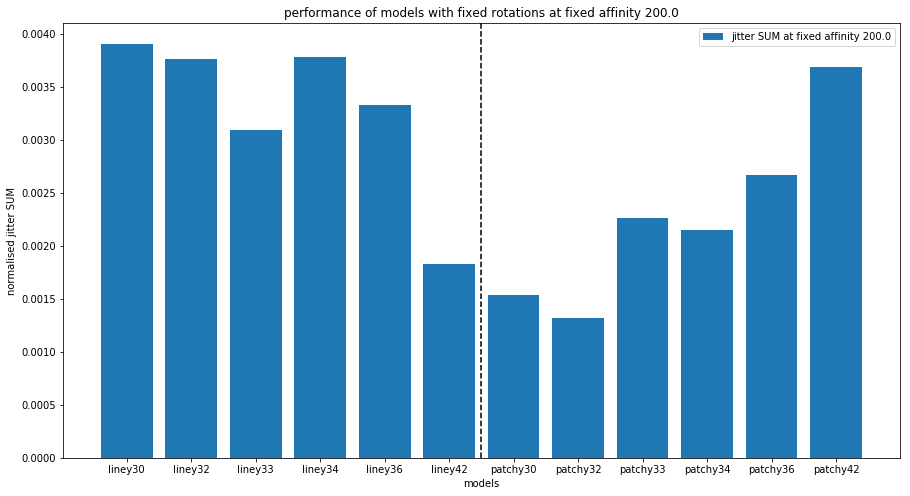

210.0


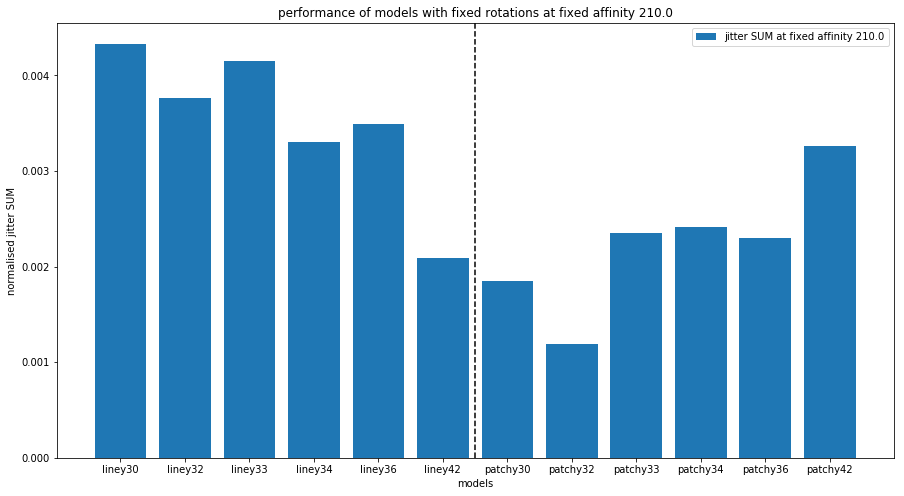

220.0


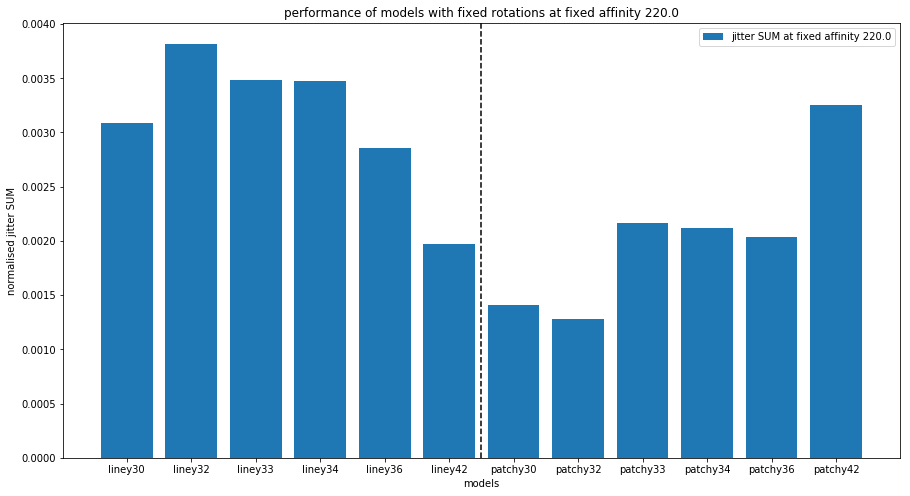

230.0


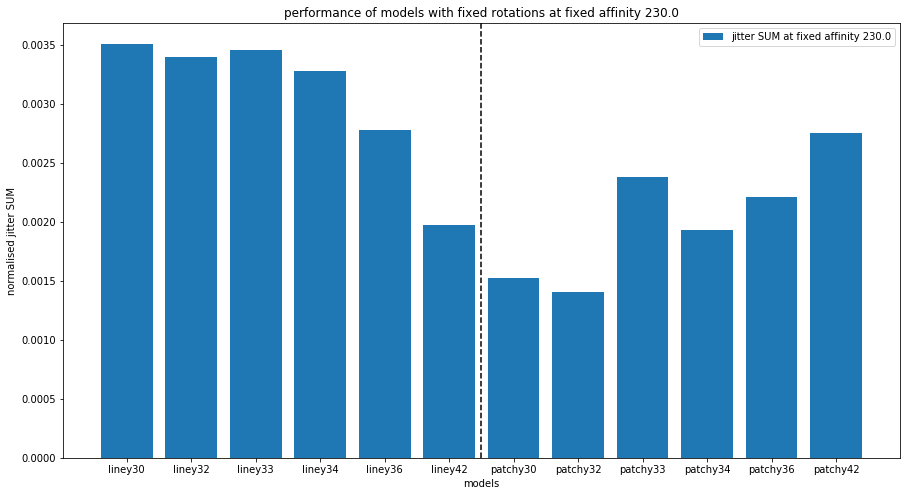

240.0


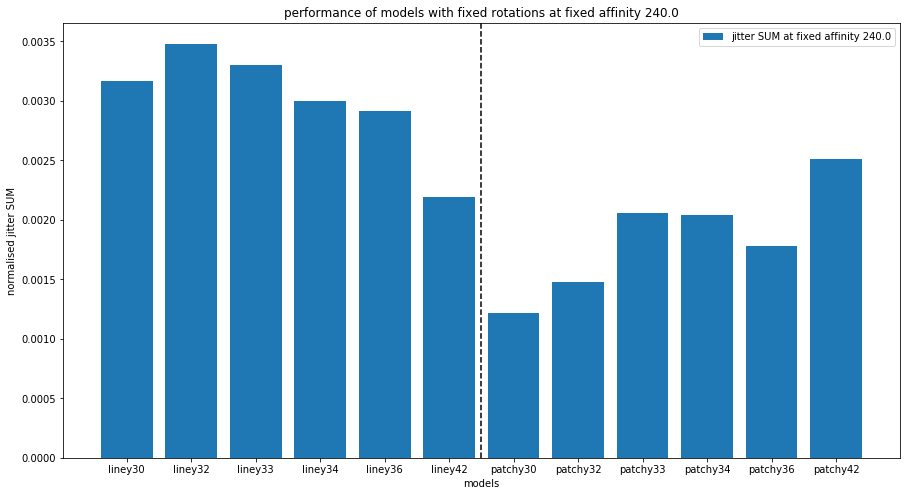

250.0


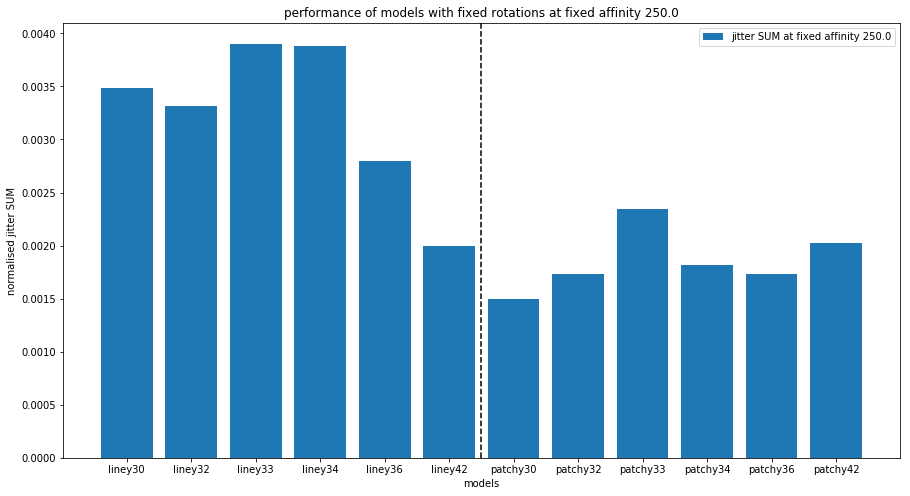

In [178]:
for aff in ['200.0','210.0','220.0','230.0','240.0','250.0']:
    print(aff)
    plotData = jitterSUMPlot(aff)
    plotData = sorted(plotData, key=lambda x:x[0])
    plt.bar([i[0] for i in plotData], [i[1] for i in plotData], label='jitter SUM at fixed affinity {}'.format(aff))
    #plt.axhline(y=400.0, c='k')
    plt.axvline(x=5.5, c='k',ls='--')
    plt.xlabel('models')
    plt.legend()
    plt.ylabel('normalised jitter SUM')
    plt.title('performance of models with fixed rotations at fixed affinity {}'.format(aff))
    plt.show();

In [185]:
#jitter SUM plots
def metaMAXPlot(affinity):
    plotData = []

    for model, rotp in data[affinity].items():
        affinitydata[model] = []
        modeldata = []
        if len(rotp) != 6:
            raise ValueError
        for rotp_i in rotp:            
            metaMax = None
            data_i = PKL.load(open(rotp_i))
            cD = data_i[0]
            bT = data_i[6]

            if not bT:
                bT = 25000.0

            cD = atools.cleanContactData(cD, bT)
            _, _, metaMax, _ = atools.metastableLIFETIME(cD)

            #print(affinity)
            #print(jSUM)
            bT = 250.0
            metaMax = float(metaMax)/float(bT)
            modeldata.append(metaMax)
        #raise TypeError
        
        plotData.append((model,np.average(modeldata)))
    return plotData

200.0


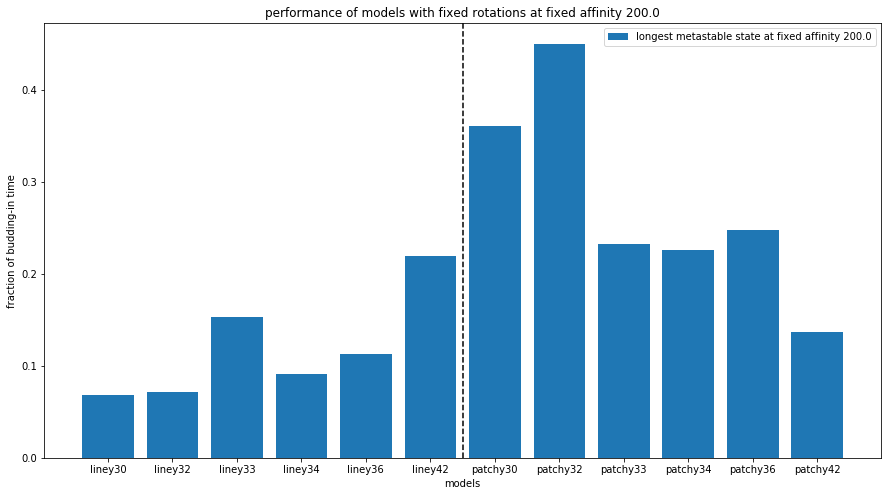

210.0


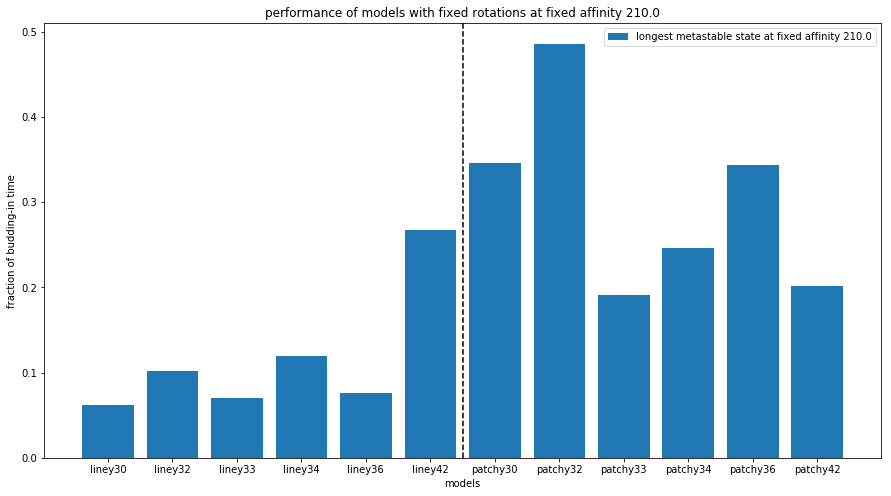

220.0


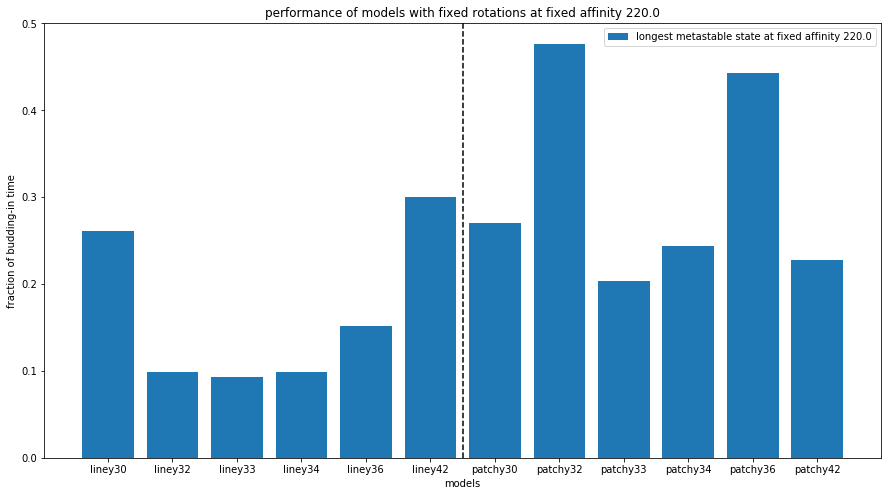

230.0


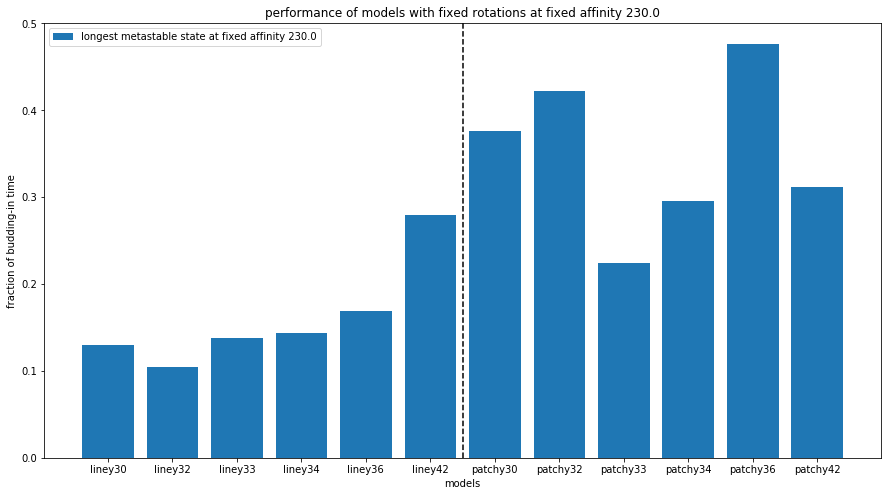

240.0


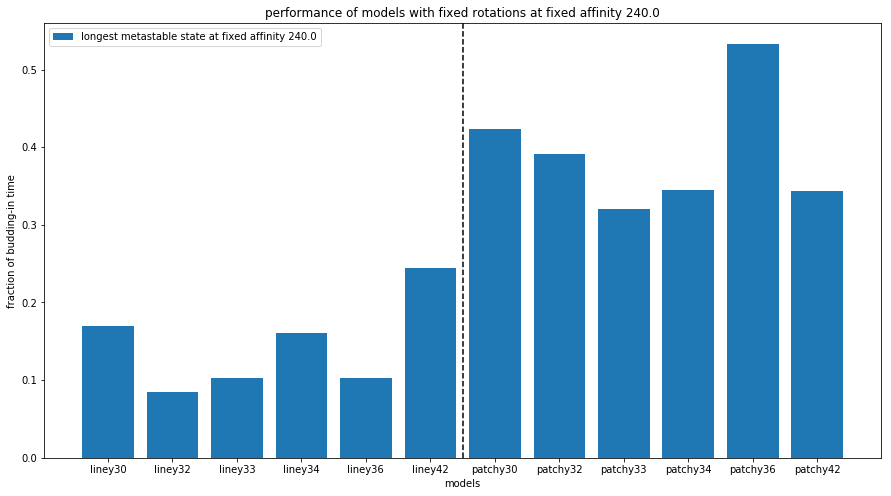

250.0


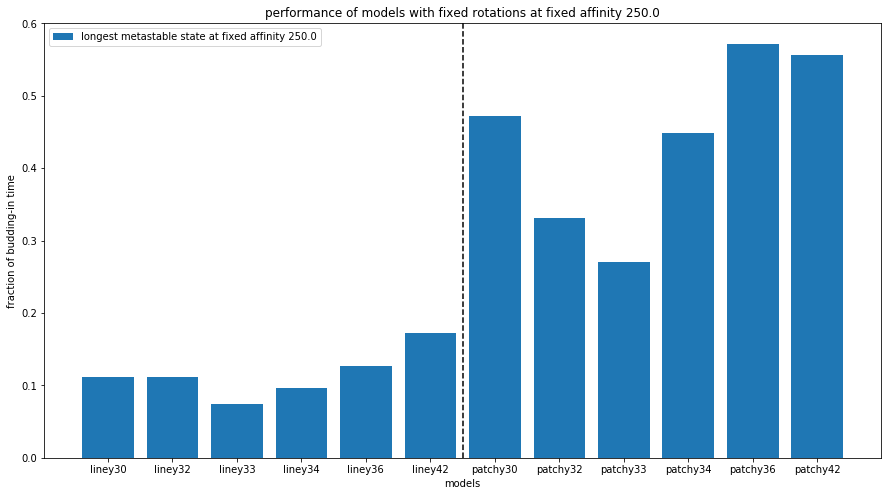

In [188]:
for aff in ['200.0','210.0','220.0','230.0','240.0','250.0']:
    print(aff)
    plotData = metaMAXPlot(aff)
    plotData = sorted(plotData, key=lambda x:x[0])
    plt.bar([i[0] for i in plotData], [i[1] for i in plotData], label='longest metastable state at fixed affinity {}'.format(aff))
    #plt.axhline(y=400.0, c='k')
    plt.axvline(x=5.5, c='k',ls='--')
    plt.xlabel('models')
    plt.legend()
    plt.ylabel('fraction of budding-in time')
    plt.title('performance of models with fixed rotations at fixed affinity {}'.format(aff))
    plt.show();